In [1]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

ModuleNotFoundError: No module named 'masquer'

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# TD_10_1 - Représentation d'un graphe

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.image as mpimg
%matplotlib notebook

Ce cours est une version "jupyter notebook" du [cours proposé par Stéphan Van Zuijlen](http://isn-icn-ljm.pagesperso-orange.fr/NSI-TLE/co/section_chapitre3.html)

## Comment représenter un graphe

Un graphe est caractérisé par sa matrice d’adjacence composée de 1 et de 0 selon que deux sommets sont ou ne sont pas reliés par une arête.  
  
Une façon d’encoder un graphe sous Python est d’utiliser un dictionnaire qui sera la représentation de sa matrice d’adjacence.  
  
Les clés seront les sommets du graphe et leur valeur sera la liste des sommets adjacents.  
  
Prenons par exemple ce graphe :

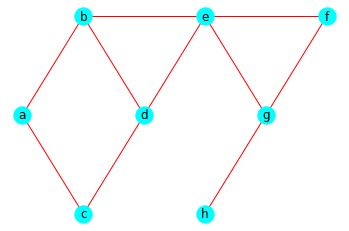

In [5]:
G = nx.DiGraph([("a","b"), ("a","c"), ("b","d"), ("c","d"),
                ("b","e"), ("d","e"), ("e","g"), ("e","f"),
                ("f","g"), ("g","h")])
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

$\begin{array}{ccccccccc}
 & \left. \begin{matrix} a & b & c & d & e & f & g & h\end{matrix} \right. \\
 \begin{matrix} a\\
 b\\
 c\\
 d\\
 e\\
 f\\
 g\\
 h \end{matrix} & \left( \begin{matrix}
 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
 1 & 0 & 0 & 1 & 1 & 0 & 0 & 0\\
 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
 0 & 1 & 1 & 0 & 1 & 0 & 0 & 0\\
 0 & 1 & 0 & 1 & 0 & 1 & 1 & 0\\
 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0\\
 0 & 0 & 0 & 0 & 1 & 1 & 0 & 1\\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{matrix} \right)
\end{array}$

Cela donne:

In [6]:
G = {}
G['a'] = ['b','c']
G['b'] = ['a','d','e']
G['c'] = ['a','d']
G['d'] = ['b','c','e']
G['e'] = ['b','d','f','g']
G['f'] = ['e','g']
G['g'] = ['e','f','h']
G['h'] = ['g']

Pour la matrice d’adjacence, on peut l’écrireà la main, en utilisant une liste de liste :

In [10]:
A1=[[0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0]]

A1

[[0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0]]

Ou bien utiliser ce code pour la fabriquer à partir de la liste des sommets et du dictionnaire G:

In [9]:
liste=['a','b','c','d','e','f','g','h']
n = len(liste)
A=[[0]*n for i in range(n)]

for i in range(n):
    for j in range(n):
        if liste[j] in G[liste[i]]:
            A[i][j]=1
            
A

[[0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0]]

## Quelques fonctions pour exploiter le graphe

Voici quelques rappels sur les dictionnaires:

In [14]:
print(G.keys()) # affiche les clés

dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])


In [15]:
print(G.values()) # affiche les valeurs

dict_values([['b', 'c'], ['a', 'd', 'e'], ['a', 'd'], ['b', 'c', 'e'], ['b', 'd', 'f', 'g'], ['e', 'g'], ['e', 'f', 'h'], ['g']])


In [16]:
print(len(G)) # affiche le nombre de clés

8


In [17]:
print(G['e']) # affiche la valeur de la clé ’e’

['b', 'd', 'f', 'g']


In [18]:
# G.keys() et G.values() sont itérables

# affiche les valeurs du dictionnaire
for el in G.values():
    print(el)

['b', 'c']
['a', 'd', 'e']
['a', 'd']
['b', 'c', 'e']
['b', 'd', 'f', 'g']
['e', 'g']
['e', 'f', 'h']
['g']


In [20]:
# affiche les clés et les valeurs des clés
for key in G.keys():
    print(key,G[key])

a ['b', 'c']
b ['a', 'd', 'e']
c ['a', 'd']
d ['b', 'c', 'e']
e ['b', 'd', 'f', 'g']
f ['e', 'g']
g ['e', 'f', 'h']
h ['g']


### Exercice 1:  
Écrire des fonctions permettant d’obtenir les informations suivante sur le graphe G:  
* le nombre de sommets du graphe  
* le nombre d’arêtes du graphe  
* le degré d’un sommet  
* le sommet de plus haut degré  
* les voisins d’un sommet

### Exercice 2:
Implémenter le graphe du réseau social du cours et faire afficher celui qui a le plus d’amis.

## Avec une bibliothèque

La bibliothèque [networkX](https://networkx.github.io/)  permet de manipuler des graphes. Continuons avec le graphe du début.

In [21]:
# On importe le module
import networkx as nx

In [22]:
# Création du graphe
g1 = nx.Graph()

In [23]:
# On ajoute les sommets (appelés node)
g1.add_node('a')
g1.add_node('b')
g1.add_node('c')
g1.add_node('d')
g1.add_node('e')
g1.add_node('f')
g1.add_node('g')
g1.add_node('h')

In [24]:
# On ajoute les arêtes (appelées edge)
g1.add_edge('a','b')
g1.add_edge('a','c')
g1.add_edge('b','d')
g1.add_edge('b','e')
g1.add_edge('c','d')
g1.add_edge('d','e')
g1.add_edge('e','g')
g1.add_edge('e','f')
g1.add_edge('g','f')
g1.add_edge('g','h')

On peut visualiser le graphe grâce à matplotlib et la fonction draw.  
  
Ici on a de plus configuré l’affichage pour que les étiquettes des sommets soient affichées, la taille des sommets soit de 800, la couleur de fond des sommets gris clair.

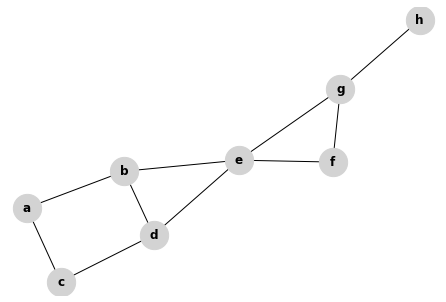

In [25]:
import matplotlib.pyplot as plt

nx.draw(g1, with_labels=True, font_weight='bold',
        node_size=800, node_color='lightgrey')
plt.show()

On peut également le faire avec des listes de sommets et d’arêtes:

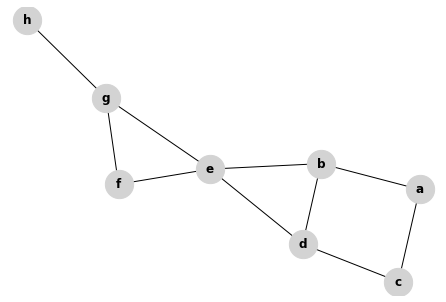

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
#création du graphe à partir de listes
liste1 = ['a','b','c','d','e','f','g','h']
g2 = nx.Graph()
g2.add_nodes_from(liste1)

liste2=[('a','b'),('a','c'),('b','d'),('b','e'),
        ('c','d'),('d','e'),('e','g'),('e','f'),
        ('g','f'),('g','h')]
g2.add_edges_from(liste2)

nx.draw(g2, with_labels=True, font_weight='bold', node_size=800,node_color='lightgrey')
plt.show()

Pour la matrice d’adjacence:  
networkx propose une méthode **nx.adjacency_matrix(g2)** qui stocke les coefficients $a_{ij}$ de la matrice d’adjacence. Il suffit alors de remplir un tableau avec ces coefficients.

In [33]:
B = nx.adjacency_matrix(g2)
print(B[(0,0)])

n=len(liste1)
A=[[0]*n for i in range(n)] 

for i in range(n):
    for j in range(n):
        A[i][j] = B[(i,j)]
print(A)

0.0
[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]


## Exploiter la bibliothèque

La documentation de NetworkX est divisée en sections. Il existe notamment:  
* une section pour obtenir les [méthodes sur les sommets et les arêtes](https://networkx.github.io/documentation/stable/reference/functions.html)
* une section pour obtenir [les algorithmes disponibles](https://networkx.github.io/documentation/stable/reference/algorithms/index.html)
* on pourra aussi consulter [le tutoriel de NetworkX](https://networkx.github.io/documentation/stable/tutorial.html)
  
En voici quelques unes:
degré d’un sommet du graphe g:  
**g.degree('a')**  
  
nombre de sommets du graphe g:  
**g.number_of_nodes()**  
  
nombre d’arcs du graphe g:  
**g.number_of_edges()**  
  
**g.predecessors(i)**: liste des prédecesseurs du sommet i  
**g.successors(i)**: liste des successeurs du sommet i  
**g.neighbors(i)**: liste des voisins du sommet i

### Exercice 3

Avec NetworkX, cherchez les méthodes pour obtenir les informations suivantes sur le graphe G:  
* le nombre de sommets du graphe  
* le nombre d’arêtes du graphe  
* le degré d’un sommet  
* le sommet de plus haut degré  
* les voisins d’un sommet

### Exercice 4:  
Implémenter le graphe du réseau social du cours et faire afficher celui qui a le plus d’amis.